In [5]:
!pip install pillow

   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.0 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.0 MB 884.1 kB/s eta 0:00:08
   ---- ----------------------------------- 0.8/7.0 MB 884.1 kB/s eta 0:00:08
   ----- ---------------------------------- 1.0/7.0 MB 968.5 kB/s eta 0:00:07
   ------- -------------------------------- 1.3/7.0 MB 907.1 kB/s eta 0:00:07
   ---------- ----------------------------- 1.8/7.0 MB 1.2 MB/s eta 0:00:05
   ----------- ---------------------------- 2.1/7.0 MB 1.2 MB/s eta 0:00:05
   -------------- ------------------------- 2.6/7.0 MB 1.3 MB/s eta 0:00:04
   ---------------- ----------------------- 2.

In [ ]:
!pip install torch

In [7]:
#统一需要处理的图片尺寸  
from PIL import Image, UnidentifiedImageError
import os

# 定义缩放函数
def resize_images(folder_path, size=(224, 224)):
    if not os.path.exists(folder_path):
        print(f"❌ 警告：文件夹 '{folder_path}' 不存在，已跳过。")
        return
        
    count = 0
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, filename)
            try:
                img = Image.open(image_path)
                img = img.convert("RGB")
                img = img.resize(size)
                img.save(image_path)
                count += 1
            except UnidentifiedImageError:
                print(f"⚠️ 文件无法识别为图像：{filename}")
            except Exception as e:
                print(f"❌ 处理失败 {filename}：{e}")
    print(f"✅ 完成！在 '{folder_path}' 共处理 {count} 张图片，尺寸为 {size}")

#  调用函数来处理图片
# 处理第一个路径：'img/doraemon' 文件夹
resize_images('img/doraemon', size=(224, 224))

# 处理第二个路径：'img/others' 文件夹
# 只需再写一行调用代码即可
resize_images('img/others', size=(224, 224))

✅ 完成！在 'img/doraemon' 共处理 65 张图片，尺寸为 (224, 224)
✅ 完成！在 'img/others' 共处理 65 张图片，尺寸为 (224, 224)


D:\anaconda3\Lib\site-packages\matplotlib\mpl-data\matplotlibrc

开始处理文件夹: img/doraemon
在 'img/doraemon' 找到 65 张原始图片
开始在 'augmented\doraemon' 生成增强图片...
✅ 在 'augmented\doraemon' 已生成 650 张增强图片。


C:\Windows\Temp\ipykernel_25764\3602134135.py:125: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_25764\3602134135.py:125: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_25764\3602134135.py:125: UserWarning: Glyph 22686 (\N{CJK UNIFIED IDEOGRAPH-589E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_25764\3602134135.py:125: UserWarning: Glyph 24378 (\N{CJK UNIFIED IDEOGRAPH-5F3A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


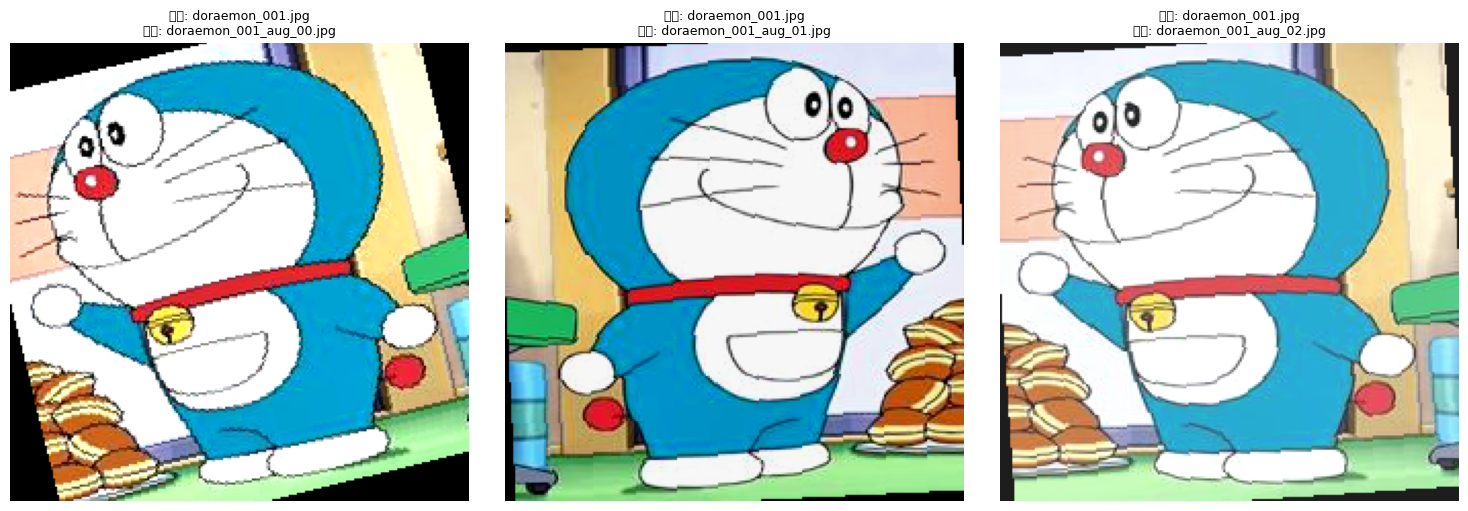

文件夹 'img/doraemon' 处理完成！

开始处理文件夹: img/others
在 'img/others' 找到 65 张原始图片
开始在 'augmented\others' 生成增强图片...
✅ 在 'augmented\others' 已生成 650 张增强图片。


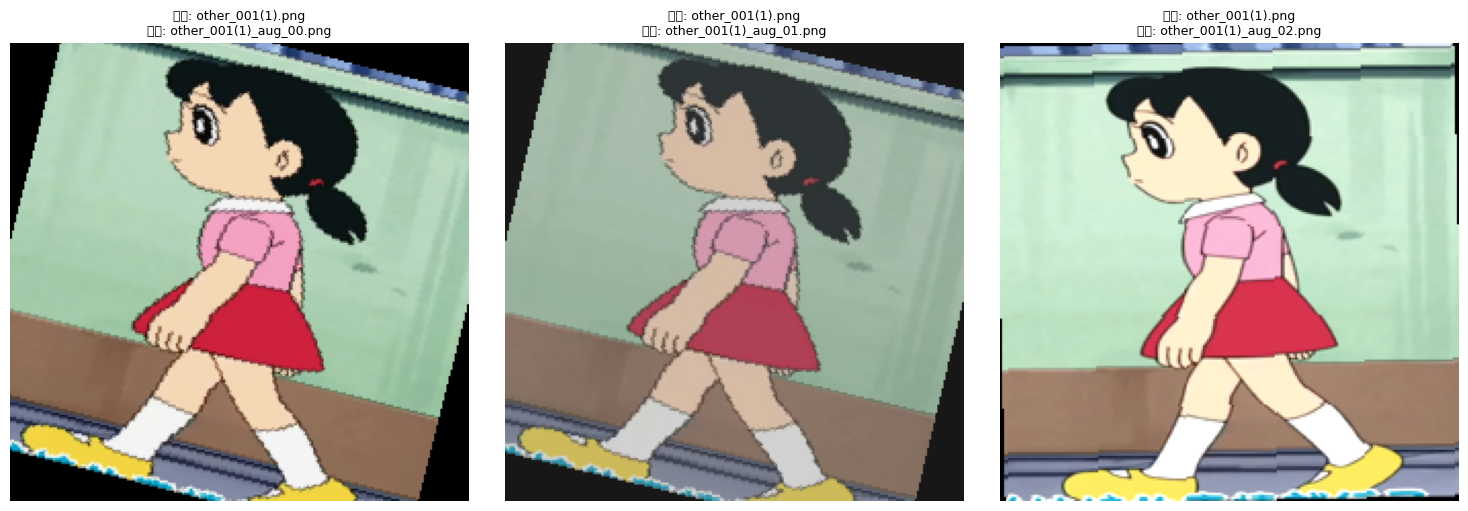

文件夹 'img/others' 处理完成！


In [9]:
#对所有图片进行数据增强 
import os
import torch
import numpy as np
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import random
#永久配置 Matplotlib 中文字体
import matplotlib
print(matplotlib.matplotlib_fname())
# 设置 matplotlib 支持中文
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
# 设置随机种子以保证结果可复现
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed()

# 数据增强转换
transform = transforms.Compose([
    transforms.Resize((224, 224)),            # 调整大小
    transforms.RandomHorizontalFlip(p=0.5),    # 50%概率水平翻转
    transforms.RandomRotation(15),             # ±15度随机旋转
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 颜色扰动
    transforms.ToTensor(),                     # 转换为张量
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # 标准化
])

# 自定义数据集类
class CustomImageDataset(Dataset):
    def __init__(self, folder_path, transform=None, num_augmentations=10):
        self.folder_path = folder_path
        self.transform = transform
        self.num_augmentations = num_augmentations
        
        # 获取所有图片文件
        self.image_files = [
            f for f in os.listdir(folder_path) 
            if f.lower().endswith(('.jpg', '.png', '.jpeg'))
        ]
        
        if not self.image_files:
            print(f"警告: 在文件夹 '{folder_path}' 中未找到任何图片。")
        else:
            print(f"在 '{folder_path}' 找到 {len(self.image_files)} 张原始图片")
    
    def __len__(self):
        # 返回增强后的总图片数
        return len(self.image_files) * self.num_augmentations
    
    def __getitem__(self, idx):
        # 计算原始图片索引和增强次数索引
        orig_idx = idx // self.num_augmentations
        aug_idx = idx % self.num_augmentations
        
        img_path = os.path.join(self.folder_path, self.image_files[orig_idx])
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image, orig_idx, aug_idx

# 保存增强图片的函数
def save_augmented_images(dataset, output_folder, num_samples_to_show=3):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        print(f"创建输出目录: {output_folder}")
    
    # 如果数据集为空，则直接返回
    if len(dataset) == 0:
        print("数据集为空，跳过保存。")
        return

    # 创建DataLoader
    dataloader = DataLoader(dataset, batch_size=1, shuffle=False)
    
    print(f"开始在 '{output_folder}' 生成增强图片...")
    
    # 用于展示样本的图像列表
    sample_images = []
    
    for i, (image_tensor, orig_idx, aug_idx) in enumerate(dataloader):
        # 转换为PIL图像
        image_tensor = image_tensor.squeeze(0)  # 去除批次维度
        
        # 反标准化: (image * std) + mean
        image_tensor = image_tensor * 0.5 + 0.5
        image_tensor = torch.clamp(image_tensor, 0, 1)  # 确保值在[0,1]范围内
        
        # 转换为numpy数组并调整维度顺序
        image_np = image_tensor.numpy().transpose((1, 2, 0))
        image_pil = Image.fromarray((image_np * 255).astype(np.uint8))
        
        # 获取原始文件名和扩展名
        orig_filename = dataset.image_files[orig_idx.item()]
        filename, ext = os.path.splitext(orig_filename)
        
        # 创建新文件名
        new_filename = f"{filename}_aug_{aug_idx.item():02d}{ext}"
        output_path = os.path.join(output_folder, new_filename)
        
        # 保存图片
        image_pil.save(output_path)
        
        # 收集前几个样本用于展示
        if i < num_samples_to_show:
            sample_images.append((image_pil, orig_filename, new_filename))
    
    print(f"✅ 在 '{output_folder}' 已生成 {len(dataset)} 张增强图片。")
    
    # 展示并保存样本对比图
    if sample_images:
        plt.figure(figsize=(15, 5))
        for j, (img, orig_name, aug_name) in enumerate(sample_images):
            plt.subplot(1, num_samples_to_show, j+1)
            plt.imshow(img)
            plt.title(f"原始: {orig_name}\n增强: {aug_name}", fontsize=9)
            plt.axis('off')
        plt.tight_layout()
        sample_output_path = os.path.join(output_folder, "augmentation_samples.jpg")
        # plt.savefig(sample_output_path)
        # print(f"样本对比图已保存至: {sample_output_path}")
        plt.show()

# 主函数
def main():
    # 1. 定义要处理的所有输入文件夹路径
    input_folders = [
        'img/doraemon', 
        'img/others'
    ]
    
    # 2. 定义总的输出根目录
    base_output_folder = 'augmented'
    
    # 3. 每张原始图片生成的增强数量
    num_augmentations_per_image = 10
    
    # 4. 循环处理每个输入文件夹
    for folder in input_folders:
        print(f"\n=============================================")
        print(f"开始处理文件夹: {folder}")
        print(f"=============================================")
        

        # 从输入路径中获取最后一个文件夹的名称 (e.g., 'doraemon', 'others')
        # os.path.basename(folder) 会直接获取路径的最后一部分
        output_subfolder_name = os.path.basename(folder)
        
        # 将基础输出目录和子文件夹名称拼接起来
        output_folder = os.path.join(base_output_folder, output_subfolder_name)
        # --- 修改结束 ---
        
        # 创建数据集
        dataset = CustomImageDataset(
            folder_path=folder,
            transform=transform,
            num_augmentations=num_augmentations_per_image
        )
        
        # 保存增强图片
        save_augmented_images(dataset, output_folder)
        
        print(f"文件夹 '{folder}' 处理完成！")

if __name__ == "__main__":
    main()

In [11]:
#划分数据集为 train/val
import os
import shutil
from sklearn.model_selection import train_test_split

def split_and_copy_dataset(input_root, output_root, train_split=0.8, random_state=42):
    """
    将增强后的数据集按比例划分为训练集和验证集，并复制到新的目录结构中。

    :param input_root: 增强后数据集的根目录 (e.g., 'augmented')
    :param output_root: 划分后数据集的根目录 (e.g., '.')
    :param train_split: 训练集所占比例 (默认 0.8, 即 80%)
    :param random_state: 随机种子，保证划分结果可复现
    """
    # 定义训练集和验证集的输出路径
    train_dir = os.path.join(output_root, 'train')
    val_dir = os.path.join(output_root, 'val')

    # 获取所有类别（即 input_root 下的子文件夹）
    classes = [d for d in os.listdir(input_root) if os.path.isdir(os.path.join(input_root, d))]
    
    if not classes:
        print(f"错误：在 '{input_root}' 目录下未找到任何类别子文件夹。")
        return

    print(f"找到类别: {classes}")
    print(f"训练集比例: {train_split}, 验证集比例: {1-train_split}")

    # 为每个类别创建对应的输出文件夹
    for class_name in classes:
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

    total_train_files = 0
    total_val_files = 0

    # 遍历每个类别
    for class_name in classes:
        print(f"\n正在处理类别: {class_name}...")
        
        # 类别输入路径
        class_input_path = os.path.join(input_root, class_name)
        
        # 获取该类别下所有图片文件
        image_files = [f for f in os.listdir(class_input_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        if not image_files:
            print(f"警告：在 '{class_input_path}' 中未找到任何图片。")
            continue

        # 随机划分训练集和验证集
        train_files, val_files = train_test_split(
            image_files,
            train_size=train_split,
            random_state=random_state,
            shuffle=True
        )

        # 复制训练集图片
        for file in train_files:
            src = os.path.join(class_input_path, file)
            dst = os.path.join(train_dir, class_name, file)
            shutil.copy2(src, dst) # 使用 copy2 保留元数据
        
        # 复制验证集图片
        for file in val_files:
            src = os.path.join(class_input_path, file)
            dst = os.path.join(val_dir, class_name, file)
            shutil.copy2(src, dst)

        print(f"  - 训练集: {len(train_files)} 张图片")
        print(f"  - 验证集: {len(val_files)} 张图片")
        
        total_train_files += len(train_files)
        total_val_files += len(val_files)

    print("\n=============================================")
    print("数据集划分完成！")
    print(f"总训练集图片数: {total_train_files}")
    print(f"总验证集图片数: {total_val_files}")
    print(f"\n文件结构如下:")
    print(f"- {train_dir}")
    print(f"  - doraemon/")
    print(f"  - others/")
    print(f"- {val_dir}")
    print(f"  - doraemon/")
    print(f"  - others/")
    print("=============================================")

if __name__ == "__main__":
    # --- 配置参数 ---
    # 增强后的数据所在根目录
    INPUT_DATASET_ROOT = 'augmented' 
    # 划分后的数据将要保存的根目录 ('.' 表示当前目录)
    OUTPUT_DATASET_ROOT = '.'       
    # 训练集所占比例
    TRAIN_SPLIT_RATIO = 0.8         
    
    # 执行划分和复制
    split_and_copy_dataset(
        input_root=INPUT_DATASET_ROOT,
        output_root=OUTPUT_DATASET_ROOT,
        train_split=TRAIN_SPLIT_RATIO
    )

找到类别: ['doraemon', 'others']
训练集比例: 0.8, 验证集比例: 0.19999999999999996

正在处理类别: doraemon...
  - 训练集: 520 张图片
  - 验证集: 130 张图片

正在处理类别: others...
  - 训练集: 520 张图片
  - 验证集: 130 张图片

数据集划分完成！
总训练集图片数: 1040
总验证集图片数: 260

文件结构如下:
- .\train
  - doraemon/
  - others/
- .\val
  - doraemon/
  - others/


In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 图像预处理：统一大小、转为Tensor、归一化
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # 如果是RGB可以用三个通道
])

# 加载训练集和验证集
train_dataset = datasets.ImageFolder('train', transform=transform)
val_dataset = datasets.ImageFolder('val', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


In [3]:
#定义和准备模型
import torch.nn as nn
import torchvision.models as models

# 加载预训练的 ResNet18，并改输出层为2类（哆啦A梦 / Others）
# model = models.resnet18(pretrained=True)
from torchvision.models import ResNet18_Weights

model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, 2)  # 输出为2类

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [5]:
import torch.optim as optim
#定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
#模型训练
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (outputs.argmax(1) == labels).sum().item()

    acc = correct / len(train_dataset)
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}, Accuracy: {acc:.4f}")


梯度检查 - conv1.weight: 0.589876
梯度检查 - layer1.0.conv1.weight: 0.620609
梯度检查 - layer1.0.conv2.weight: 0.466882
梯度检查 - layer1.1.conv1.weight: 0.564511
梯度检查 - layer1.1.conv2.weight: 0.507555
梯度检查 - layer2.0.conv1.weight: 0.630123
梯度检查 - layer2.0.conv2.weight: 0.698738
梯度检查 - layer2.1.conv1.weight: 0.737415
梯度检查 - layer2.1.conv2.weight: 0.688623
梯度检查 - layer3.0.conv1.weight: 0.899229
梯度检查 - layer3.0.conv2.weight: 1.125679
梯度检查 - layer3.1.conv1.weight: 1.099206
梯度检查 - layer3.1.conv2.weight: 0.990550
梯度检查 - layer4.0.conv1.weight: 1.341137
梯度检查 - layer4.0.conv2.weight: 1.771481
梯度检查 - layer4.1.conv1.weight: 2.014028
梯度检查 - layer4.1.conv2.weight: 2.192842
总梯度范数: 29.371125
Epoch: 1/10 | Batch: 0/33 | Loss: 0.6251 | Acc: 0.7188

Epoch 1 汇总:
平均损失: 0.0888
训练准确率: 0.9702 (1009/1040)
--------------------------------------------------
Epoch: 2/10 | Batch: 0/33 | Loss: 0.0010 | Acc: 1.0000

Epoch 2 汇总:
平均损失: 0.0182
训练准确率: 0.9933 (1033/1040)
损失变化: ↓ 0.0706
准确率变化: ↑ 0.0231
---------------------------------

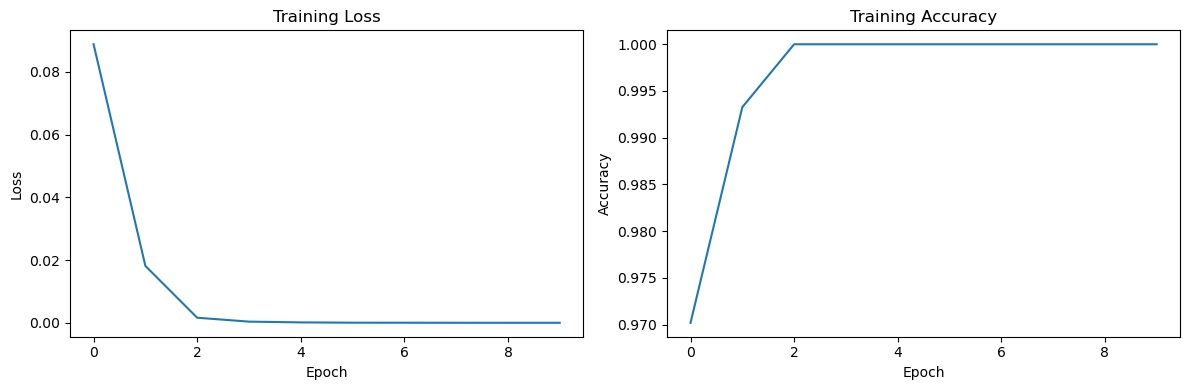

In [7]:
# 模型训练
num_epochs = 10

# 记录训练过程中的指标
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total_samples = 0
    
    # 添加批次进度信息
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        
        # 可选：打印梯度信息
        if batch_idx == 0 and epoch == 0:  # 只在第一个epoch的第一个batch打印
            total_grad = 0
            for name, param in model.named_parameters():
                if param.grad is not None:
                    grad_norm = param.grad.norm().item()
                    total_grad += grad_norm
                    if "weight" in name and "conv" in name:  # 示例：打印卷积层的梯度
                        print(f"梯度检查 - {name}: {grad_norm:.6f}")
            print(f"总梯度范数: {total_grad:.6f}")
        
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total_samples += labels.size(0)
        
        # 每N个batch打印一次进度
        if batch_idx % 100 == 0:
            batch_acc = predicted.eq(labels).sum().item() / labels.size(0)
            print(f'Epoch: {epoch+1}/{num_epochs} | '
                  f'Batch: {batch_idx}/{len(train_loader)} | '
                  f'Loss: {loss.item():.4f} | '
                  f'Acc: {batch_acc:.4f}')

    # 计算epoch统计信息
    epoch_loss = total_loss / len(train_loader)
    epoch_acc = correct / total_samples
    
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    
    print(f"\nEpoch {epoch+1} 汇总:")
    print(f"平均损失: {epoch_loss:.4f}")
    print(f"训练准确率: {epoch_acc:.4f} ({correct}/{total_samples})")
    
    # 损失和准确率变化趋势
    if epoch > 0:
        loss_change = train_losses[-2] - train_losses[-1]  # 正数表示损失下降
        acc_change = train_accuracies[-1] - train_accuracies[-2]  # 正数表示准确率上升
        print(f"损失变化: {'↓' if loss_change > 0 else '↑'} {abs(loss_change):.4f}")
        print(f"准确率变化: {'↑' if acc_change > 0 else '↓'} {abs(acc_change):.4f}")
    
    print("-" * 50)

# 训练完成后的总结
print("\n训练完成!")
print(f"最终训练损失: {train_losses[-1]:.4f}")
print(f"最终训练准确率: {train_accuracies[-1]:.4f}")
print(f"损失从 {train_losses[0]:.4f} 下降到 {train_losses[-1]:.4f}")
print(f"准确率从 {train_accuracies[0]:.4f} 提升到 {train_accuracies[-1]:.4f}")

# 可选：绘制训练曲线
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [9]:
#模型验证
model.eval()
correct = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        correct += (outputs.argmax(1) == labels).sum().item()

val_acc = correct / len(val_dataset)
print(f"Validation Accuracy: {val_acc:.4f}")


Validation Accuracy: 1.0000


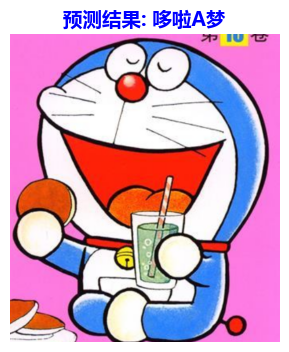

In [11]:
#单张图片检测
import matplotlib.pyplot as plt
from matplotlib import rcParams
from PIL import Image
import torch
from torchvision import transforms

# 设置 matplotlib 支持中文
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

class_names = ['哆啦A梦', '其他']  

def predict_and_show(model, image_path, device='cpu'):
    model.eval()
    try:
        image = Image.open(image_path).convert('RGB')
        input_tensor = transform(image).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(input_tensor)
            _, predicted = torch.max(output, 1)
            class_name = class_names[predicted.item()]

        plt.figure(figsize=(4, 4))
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"预测结果: {class_name}", fontsize=14, color='blue', weight='bold')
        plt.show()

    except Exception as e:
        print(f"❌ 预测失败: {e}")
image_path = "test/01.png"
predict_and_show(model, image_path, device=device)
